In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt

In [2]:
sms_data = pd.read_csv("spam.csv", encoding='latin-1')

In [3]:
sms_data = sms_data[['v1', 'v2']]
sms_data = sms_data.rename(columns={'v1': 'label', 'v2': 'text'})

In [4]:
sms_data

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [5]:
X = sms_data['text']
y = sms_data['label']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

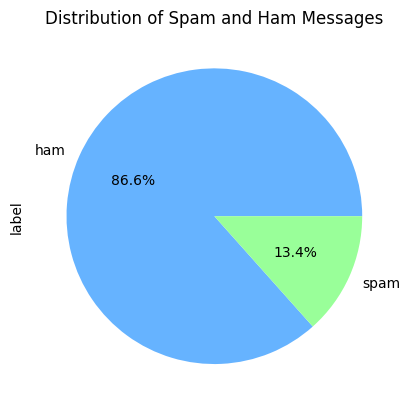

In [7]:
class_distribution = sms_data['label'].value_counts()
class_distribution.plot(kind='pie', autopct='%1.1f%%', colors=['#66b3ff','#99ff99'])
plt.title('Distribution of Spam and Ham Messages')
plt.show()

In [8]:
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [9]:
X_train_vec

<4457x7735 sparse matrix of type '<class 'numpy.int64'>'
	with 58978 stored elements in Compressed Sparse Row format>

In [10]:
mnb = MultinomialNB(alpha=0.8, fit_prior=True, force_alpha=True)
mnb.fit(X_train_vec, y_train)

MultinomialNB(alpha=0.8)

In [11]:
gnb = GaussianNB()
gnb.fit(X_train_vec.toarray(), y_train)

GaussianNB()

In [12]:
y_pred_mnb = mnb.predict(X_test_vec)
accuracy_mnb = accuracy_score(y_test, y_pred_mnb)
f1_mnb = f1_score(y_test, y_pred_mnb, pos_label='spam')
 
y_pred_gnb = gnb.predict(X_test_vec.toarray())
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
f1_gnb = f1_score(y_test, y_pred_gnb, pos_label='spam')
 
print("Multinomial Naive Bayes - Accuracy:", accuracy_mnb)
print("Multinomial Naive Bayes - F1-score for 'spam' class:", f1_mnb)
 
print("Gaussian Naive Bayes - Accuracy:", accuracy_gnb)
print("Gaussian Naive Bayes - F1-score for 'spam' class:", f1_gnb)

Multinomial Naive Bayes - Accuracy: 0.9838565022421525
Multinomial Naive Bayes - F1-score for 'spam' class: 0.9370629370629371
Gaussian Naive Bayes - Accuracy: 0.9004484304932735
Gaussian Naive Bayes - F1-score for 'spam' class: 0.7131782945736435
